## Prueba de Conocimientos Ciencia de Datos 02

En este notebook puedes utilizar todas las librerias con las que hemos trabajado.

Utilizando el dataset de **`201114COVID19MEXICO.csv`**:

### Ejercicio 0:
- Obten las estadísticas del dataset:
1. **Número de filas y columnas.**
2. **Tipo de dato de cada columna.**
3. **Las estadísticas de cada columna.**

### Ejercicio 1:
- Obten la siguiente información:
1. **Número de positivos.**
2. **Número de defunciones.**
3. **Número de positivos en cada estado.**
4. **Los nombres de los 3 estados con mayor número de positivos.**
5. **Edad promedio de los positivos.**
6. **Edad promedio de los que han fallecido.**
7. **Tiempo entre la columna `FECHA_SINTOMA` y la columna `FECHA_DEF` para los que han fallecido.**
8. **¿Cuál es la enfermedad con más prevalencia en los positivos?**
9. **¿Cuál es la enfermedad con más prevalencia en los que han fallecido?**
10. **¿Es la misma enfermedad?**

___


- **¿Que otra información podrias extraer del dataset?**
    - **Analiza el dataset y muestra 5 conclusiones.**

### Ejercicio 2:
- Obten las siguientes graficas:
1. **Gráfica de barras del número de hombres y mujeres**
2. **Grafica de barras de los positivos y no positivos**
3. **Gráfica de barras del número de positivos por estado**
4. **Gráfica de barras del número de fallecidos por estado**
5. **Gráfica de barras del número de positivos por la columna `SECTOR`**
6. **Histograma de la edad de los positivos**
7. **Histograma de la edad de los no positivos**
8. **Mapa de calor de México con el número de positivos por estado utilizando folium**
9. **Mapa de calor de México con el número de fallecidos por estado utilizando folium**

___


- **¿Que otras graficas podrias extraer del dataset?**
    - **Analiza el dataset y muestra 5 graficas, pueden ser cualquiera de las vistas en clases.**

In [1]:
# !pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
from folium import plugins

In [3]:
df = pd.read_csv("201114COVID19MEXICO.csv", encoding = "ISO-8859-1", parse_dates = [11])

df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97


# Ejercicio 0

In [4]:
# 1. Número de filas y columnas

print("Filas: ", df.shape[0])
print("Columnas: ", df.shape[1])

Filas:  2604659
Columnas:  38


In [5]:
# 2. Tipo de dato de cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 38 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FECHA_ACTUALIZACION  object        
 1   ID_REGISTRO          object        
 2   ORIGEN               int64         
 3   SECTOR               int64         
 4   ENTIDAD_UM           int64         
 5   SEXO                 int64         
 6   ENTIDAD_NAC          int64         
 7   ENTIDAD_RES          int64         
 8   MUNICIPIO_RES        int64         
 9   TIPO_PACIENTE        int64         
 10  FECHA_INGRESO        object        
 11  FECHA_SINTOMAS       datetime64[ns]
 12  FECHA_DEF            object        
 13  INTUBADO             int64         
 14  NEUMONIA             int64         
 15  EDAD                 int64         
 16  NACIONALIDAD         int64         
 17  EMBARAZO             int64         
 18  HABLA_LENGUA_INDIG   int64         
 19  INDIGENA             

In [6]:
# 3. Estadísticas de cada columna

df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,UCI
count,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,...,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06
mean,1.653697e+00,9.305706e+00,1.497912e+01,1.485867e+00,1.593824e+01,1.521911e+01,3.572881e+01,1.152521e+00,8.273965e+01,2.574456e+00,...,2.275956e+00,2.140302e+00,2.272887e+00,2.224780e+00,1.239754e+01,1.083095e+00,9.638235e+00,5.268265e+00,9.860378e+01,8.276828e+01
std,4.757912e-01,3.632421e+00,8.130242e+00,4.998003e-01,9.908850e+00,8.069411e+00,4.663257e+01,3.595252e-01,3.396808e+01,8.118889e+00,...,5.301842e+00,5.230812e+00,5.261679e+00,5.427951e+00,3.073970e+01,2.760257e-01,2.630911e+01,1.899884e+00,6.195444e+00,3.392957e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.400000e+01,1.000000e+00,1.500000e+01,1.400000e+01,2.000000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.100000e+01,2.000000e+00,2.200000e+01,2.100000e+01,4.300000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


In [7]:
# Carga del fichero "Catálogo" para poder extraer las descripciones asociadas a los códigos números de algunas columnas
xl = pd.ExcelFile("Catalogos_071020.xlsx")
catalogo = dict()
for sheet_name in xl.sheet_names:
    catalogo[sheet_name] = xl.parse(sheet_name)

xl.close()

len(catalogo)

10

# Ejercicio 1

In [8]:
# 1. Número de positivos
#
# Se consideran positivos aquellas filas con los siguiente valores en la columna CLASIFICACION_FINAL:
# - 1 : CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA
# - 2 : CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN
# - 3 : CASO DE SARS-COV-2  CONFIRMADO POR LABORATORIO

df[df["CLASIFICACION_FINAL"].isin([1, 2, 3])].shape[0]

1003253

In [9]:
# Se crea la columna auxiliar COVID para consultar de forma más sencilla si una persona ha dado positivo (valor 1)
# o no (valor 2)
df["COVID"] = df["CLASIFICACION_FINAL"].apply(lambda x : 1 if x in (1, 2, 3) else 2)
df["COVID"].value_counts()

2    1601406
1    1003253
Name: COVID, dtype: int64

In [10]:
# 2. Número de defunciones
#
# Se consideran defunciones aquellas filas donde el falor de la columna FECHA_DEF es diferente a "9999-99-99"

df[df["FECHA_DEF"] != '9999-99-99'].shape[0]

139396

In [11]:
# Se crea la columna auxiliar FALLECIDO para consultar de forma más sencilla si una persona ha fallecido (valor 1)
# o no (valor 2)
df["FALLECIDO"] = df["FECHA_DEF"].apply(lambda x : 2 if x == '9999-99-99' else 1)
df["FALLECIDO"].value_counts()

2    2465263
1     139396
Name: FALLECIDO, dtype: int64

In [12]:
# 3. Número de positivos en cada estado
# 
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID
# Se considera "estado" a la columna ENTIDAD_UM, entidad donde se ubica la unidad medica que brindó la atención

# Se guarda en una variable el conteo de positivos por estado
num_positivos = df[df["COVID"] == 1]["ENTIDAD_UM"].value_counts()

# Se crea un DataFrame auxiliar para que la información sea más accesible
df_aux = pd.DataFrame()
df_aux["Entidad"] = num_positivos.index
df_aux["Num_Positivos"] = num_positivos.values

# Se incorpora la descripción de cada estado al DataFrame de positivos con código de estado
df_pos_por_estado = df_aux.merge(catalogo["Catálogo de ENTIDADES"], left_on = "Entidad", right_on = "CLAVE_ENTIDAD", how = "inner")[["Entidad", "ENTIDAD_FEDERATIVA", "Num_Positivos"]]
df_pos_por_estado

,Entidad,ENTIDAD_FEDERATIVA,Num_Positivos
0,9,CIUDAD DE MÉXICO,213432
1,15,MÉXICO,71267
2,19,NUEVO LEÓN,60247
3,11,GUANAJUATO,53961
4,26,SONORA,40427
5,21,PUEBLA,38740
6,30,VERACRUZ DE IGNACIO DE LA LLAVE,37455
7,5,COAHUILA DE ZARAGOZA,37327
8,14,JALISCO,37323
9,27,TABASCO,35847


In [13]:
# 4. Los nombres de los 3 estados con mayor número de positivos
# 
# Se aprovecha el DataFrame del punto anterior para extraer la información

df_pos_por_estado.sort_values("Num_Positivos", axis = 0, ascending = False).head(3)

,Entidad,ENTIDAD_FEDERATIVA,Num_Positivos
0,9,CIUDAD DE MÉXICO,213432
1,15,MÉXICO,71267
2,19,NUEVO LEÓN,60247


In [14]:
# 5. Edad promedio de los positivos
# 
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID

round(df[df["COVID"] == 1]["EDAD"].mean())

44

In [15]:
# 6. Edad promedio de los que han fallecido
# 
# Se consideran defunciones aquellas filas con valor 1-Sí en la columna FALLECIDO

round(df[df["FALLECIDO"] == 1]["EDAD"].mean())

62

In [16]:
# 7. Tiempo entre la columna FECHA_SINTOMA y la columna FECHA_DEF para los que han fallecido
# 
# Se consideran defunciones aquellas filas con valor 1-Sí en la columna FALLECIDO

# Se crea nueva columna para almacenar la fecha de defunción procesada:
# - Se convierte a NaT el valor '9999-99-99'
# - Se convierte a tipo DATETIME el resto
df["FECHA_DEF2"] = df["FECHA_DEF"].apply(lambda x : np.datetime64('NaT') if x == "9999-99-99" else pd.to_datetime(x))

In [17]:
# Se calcula el tiempo solicitado para todo el DataFrame
df["Tiempo_Sintoma_Defunc"] = df["FECHA_DEF2"] - df["FECHA_SINTOMAS"]

# Nos quedamos sólo con el tiempo de las personas que han fallecido
df[df["FALLECIDO"] == 1][["FECHA_SINTOMAS", "FECHA_DEF2", "Tiempo_Sintoma_Defunc"]]

,FECHA_SINTOMAS,FECHA_DEF2,Tiempo_Sintoma_Defunc
2,2020-03-26,2020-03-30,4 days
3,2020-03-28,2020-04-02,5 days
6,2020-03-25,2020-04-05,11 days
9,2020-03-27,2020-03-31,4 days
17,2020-03-23,2020-04-05,13 days
...,...,...,...
2604249,2020-10-07,2020-10-23,16 days
2604287,2020-10-15,2020-10-22,7 days
2604459,2020-10-01,2020-10-20,19 days
2604469,2020-10-12,2020-10-12,0 days


In [18]:
# 8. ¿Cuál es la enfermedad con más prevalencia en los positivos?
# 
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID
# 
# Se consideran enfermedades las siguientes columnas:
# - DIABETES
# - EPOC
# - ASMA
# - INMUSUPR
# - HIPERTENSION
# - OTRA_COM
# - CARDIOVASCULAR
# - OBESIDAD
# - RENAL_CRONICA
# - TABAQUISMO
# Si el valor es SI (1), se considera que el paciente la padece

# Se hace una lista con el nombre de las columnas de enfermedades
enfermedades = ["DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "OTRA_COM", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO"]

# Se crea una lista vacía para guardar cuántos positivos padecían cada enfermedad
num_personas = list()

# Se hace un bucle para mostrar el número de personas con cada enfermedad y aprovisionar la lista
for enfermedad in enfermedades:
    print(f"Nº de personas con {enfermedad}: ", df[(df["COVID"] == 1) & (df[enfermedad] == 1)][enfermedad].count())
    num_personas.append(df[(df["COVID"] == 1) & (df[enfermedad] == 1)][enfermedad].count())

print("*"*100)

# Se guarda en un DataFrame el número de positivos que padecían cada enfermedad
df_prevalencia_pos = pd.DataFrame(zip(enfermedades, num_personas), columns = ["Enfermedades", "Num_Personas"])

# Nos quedamos con la enfermedad que mayor número de positivos padecía
print("La enfermedad con más prevalencia en los positivos es:\n")
df_prevalencia_pos[df_prevalencia_pos["Num_Personas"] == df_prevalencia_pos["Num_Personas"].max()]

Nº de personas con DIABETES:  147867
Nº de personas con EPOC:  13464
Nº de personas con ASMA:  25135
Nº de personas con INMUSUPR:  10230
Nº de personas con HIPERTENSION:  188107
Nº de personas con OTRA_COM:  22737
Nº de personas con CARDIOVASCULAR:  18672
Nº de personas con OBESIDAD:  171303
Nº de personas con RENAL_CRONICA:  17989
Nº de personas con TABAQUISMO:  73385
****************************************************************************************************
La enfermedad con más prevalencia en los positivos es:



,Enfermedades,Num_Personas
4,HIPERTENSION,188107


In [19]:
# 9. ¿Cuál es la enfermedad con más prevalencia en los que han fallecido?
#
# Se consideran defunciones aquellas filas con valor 1-Sí en la columna FALLECIDO
# 
# Se consideran enfermedades las siguientes columnas:
# - DIABETES
# - EPOC
# - ASMA
# - INMUSUPR
# - HIPERTENSION
# - OTRA_COM
# - CARDIOVASCULAR
# - OBESIDAD
# - RENAL_CRONICA
# - TABAQUISMO
# Si el valor es SI (1), se considera que el paciente la padece

# Aprovecho la lista "enfermedades" del punto anterior
# enfermedades = ["DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "OTRA_COM", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO"]

# Se crea una lista vacía para guardar cuántos positivos con cada enfermedad fallecieron
num_personas = list()

# Se hace un bucle para mostrar el número de personas fallecidas con cada enfermedad y aprovisionar la lista
for enfermedad in enfermedades:
    print(f"Nº de personas con {enfermedad}: ", df[(df["FALLECIDO"]== 1) & (df[enfermedad] == 1)][enfermedad].count())
    num_personas.append(df[(df["FALLECIDO"] == 1) & (df[enfermedad] == 1)][enfermedad].count())

print("*"*100)

# Se guarda en un DataFrame el número de positivos fallecidos con cada enfermedad
df_prevalencia_fall = pd.DataFrame(zip(enfermedades, num_personas), columns = ["Enfermedades", "Num_Personas"])

# Nos quedamos con la enfermedad que mayor número de positivos fallecidos padecía
print("La enfermedad con más prevalencia en los que han fallecido es:\n")
df_prevalencia_fall[df_prevalencia_fall["Num_Personas"] == df_prevalencia_fall["Num_Personas"].max()]

Nº de personas con DIABETES:  53143
Nº de personas con EPOC:  7302
Nº de personas con ASMA:  2625
Nº de personas con INMUSUPR:  4368
Nº de personas con HIPERTENSION:  61973
Nº de personas con OTRA_COM:  8823
Nº de personas con CARDIOVASCULAR:  8183
Nº de personas con OBESIDAD:  30770
Nº de personas con RENAL_CRONICA:  11508
Nº de personas con TABAQUISMO:  11687
****************************************************************************************************
La enfermedad con más prevalencia en los que han fallecido es:



,Enfermedades,Num_Personas
4,HIPERTENSION,61973


In [20]:
# 10. ¿Es la misma enfermedad?
#
# Se aprovechan los DataFrame de los 2 puntos anteriores para extraer la información

# Guardamos la enfermedad con más prevalencia en los positivos en una variable
enf_prevalencia_pos = df_prevalencia_pos[df_prevalencia_pos["Num_Personas"] == df_prevalencia_pos["Num_Personas"].max()]["Enfermedades"].all()

# Guardamos la enfermedad con más prevalencia en los que han fallecido en una variable
enf_prevalencia_fall = df_prevalencia_fall[df_prevalencia_fall["Num_Personas"] == df_prevalencia_fall["Num_Personas"].max()]["Enfermedades"].all()

# Comparamos las dos variables
print ("¿La enfermedad de los dos puntos anteriores es la misma?")
if enf_prevalencia_pos == enf_prevalencia_fall:
    print("Sí")
else:
    print("No")

¿La enfermedad de los dos puntos anteriores es la misma?
Sí


- **¿Que otra información podrias extraer del dataset?**
    - **Analiza el dataset y muestra 5 conclusiones.**

In [21]:
# 1. Número de pacientes no positivos a los que no se les tomó muestra (TOMA_MUESTRA = NO)
#
# Se consideran no positivos aquellas filas con valor 2-No en la columna COVID
# Se considera que no se les tomó muestra a aquellas filas con valor 2-No en la columna TOMA_MUESTRA

# Se hace un conteo de la columna TOMA_MUESTRA para comprobar qué valores contiene
df["TOMA_MUESTRA"].value_counts()

1    2388225
2     216434
Name: TOMA_MUESTRA, dtype: int64

In [22]:
df[(df["COVID"] == 2) & (df["TOMA_MUESTRA"] == 2)]["COVID"].count()

190876

In [23]:
# 2. ¿Hubo más pacientes positivos que fueron intubados y requirieron ingreso en la UCI, o intubados sin ir a la UCI (INTUBADO, UCI)?
#
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID
# Se considera que fueron intubados a aquellas filas con valor 2-No, 97 y 99 en la columna INTUBADO
# En la columna UCI:
# - Se considera que requirieron ingreso en la UCI a aquellas filas con valor 1-Si
# - Se considera que no fueron a la UCI a aquellas filas con valor 2-No, 97 y 99

# Se hace un conteo de la columna INTUBADO para comprobar qué valores contiene
df["INTUBADO"].value_counts()

97    2207394
2      337503
1       53062
99       6700
Name: INTUBADO, dtype: int64

In [24]:
# Se hace un conteo de la columna UCI para comprobar qué valores contiene
df["UCI"].value_counts()

97    2207394
2      357375
1       32632
99       7258
Name: UCI, dtype: int64

In [25]:
# Hacemos una lista de listas con los valores y la descripción que utilizaremos para indicar si el paciente requirió ingreso en la UCI o no
uci = [[1, "Sí"], [2, "No"]]

# Contabilizamos el número de pacientes positivos que fueron intubados y requirieron o no ingreso en la UCI
dicc_intubados = dict()
for valor, texto in uci:
    dicc_intubados[valor] = df[(df["COVID"] == 1) & (df["INTUBADO"] == 1) & (df["UCI"] == valor)]["COVID"].count()
    print(f"Pacientes intubados con UCI = {texto}: {dicc_intubados[valor]}")

Pacientes intubados con UCI = Sí: 10279
Pacientes intubados con UCI = No: 25950


In [26]:
# Comparamos los conteos
if dicc_intubados[1] > dicc_intubados[2]:
    print("Hubo más pacientes positivos que fueron intubados y requirieron ingreso en la UCI.")
else:
    print("Hubo más pacientes positivos que fueron intubados y no requirieron ingreso en la UCI")

Hubo más pacientes positivos que fueron intubados y no requirieron ingreso en la UCI


In [27]:
# 3. ¿Entre las pacientes embarazadas, hubo más positivos o no positivos?
#
# Se consideran positivos aquellas filas con el valor 1-Sí en la columna COVID
# Se consideran no positivos las filas con el valor 2-No en la columna COVID
# Se considera estar embarazada a aquellas filas con valor 1-Si en la columna EMBARAZO

# Se hace un conteo de la columna EMBARAZO para comprobar qué valores contiene
df["EMBARAZO"].value_counts()

2     1307213
97    1265519
1       22066
98       9861
Name: EMBARAZO, dtype: int64

In [28]:
# Guardamos el número de pacientes embarazadas con positivo
emb_pos = df[(df["COVID"] == 1) & (df["EMBARAZO"] == 1)]["COVID"].count()
print("Pacientes embarazadas con positivo: ", emb_pos)

# Guardamos el número de pacientes embarazadas con no positivo
emb_no_pos = df[(df["COVID"] == 2) & (df["EMBARAZO"] == 1)]["COVID"].count()
print("Pacientes embarazadas con no positivo: ", emb_no_pos)

Pacientes embarazadas con positivo:  7094
Pacientes embarazadas con no positivo:  14972


In [29]:
# Comparamos los conteos
if (emb_pos > emb_no_pos):
    print("Hubo más pacientes embarazadas con positivo.")
else:
    print("Hubo más pacientes embarazadas que no dieron positivo.")

Hubo más pacientes embarazadas que no dieron positivo.


In [30]:
# 4. Número de pacientes embarazadas no positivos con defunción
#
# Se consideran no positivos las filas con el valor 2-No en la columna COVID
# Se considera estar embarazada a aquellas filas con valor 1-Si en la columna EMBARAZO
# Se considera defunción a las filas con el valor 1-Sí en la columna COVID

df[(df["COVID"] == 2) & (df["EMBARAZO"] == 1) & (df["FALLECIDO"] == 1)]["COVID"].count()

52

In [31]:
# 5. Los 3 países de nacionalidad más frecuentes entre los positivos con nacionalidad extranjera que no fallecieron
#
# Se consideran positivos las filas con el valor 1-Sí en la columna COVID
# Se consideran nacionalidad extranjera aquellas filas con valore 2-Extranjera en la columna NACIONALIDAD
# Se consideran no fallecidos aquellas filas con el valor 2-No en la columna FALLECIDO
# Se obtendrá el país de la columna PAIS_NACIONALIDAD

# Hacemos un conteo de los valores de la columna NACIONALIDAD
df["NACIONALIDAD"].value_counts()

1    2592118
2      12541
Name: NACIONALIDAD, dtype: int64

In [32]:
# Filtramos el DataFrame para obtener los registros que cumplen lo solicitado
df[(df["COVID"] == 1) & (df["NACIONALIDAD"] == 2) & (df["FALLECIDO"] == 2)]["PAIS_NACIONALIDAD"].value_counts().head(3)

Estados Unidos de AmÃ©rica    919
Venezuela                     402
Colombia                      292
Name: PAIS_NACIONALIDAD, dtype: int64

# Ejercicio 2

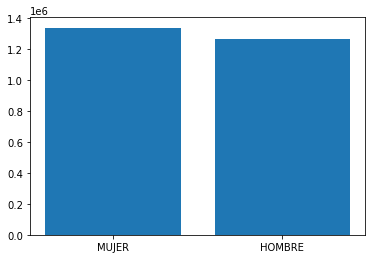

In [33]:
# 1. Gráfica de barras del número de hombres y mujeres

# Se crea la lista de etiquetas para la gráfica
etiquetas = df.merge(catalogo["Catálogo SEXO"], left_on = "SEXO", right_on = "CLAVE", how = "inner")["DESCRIPCIÓN"].value_counts(sort = False).index

# Se crea la lista de valores para la gráfica
valores = df.merge(catalogo["Catálogo SEXO"], left_on = "SEXO", right_on = "CLAVE", how = "inner")["DESCRIPCIÓN"].value_counts(sort = False).values

# Se define la gráfica de barras
plt.bar(etiquetas, valores)

# Se muestra la gráfica
plt.show()

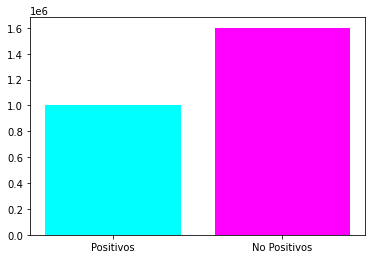

In [34]:
# 2. Grafica de barras de los positivos y no positivos
# 
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID
# Se consideran no positivos aquellas filas con valor 2-No en la columna COVID

# Variable para pacientes positivos
positivos = df[df["COVID"] == 1].count()

# Variable para pacientes no positivos
no_positivos = df[df["COVID"] == 2].count()

# Se combina la gráfica de pacientes positivos con la gráfica de pacientes no positivos
plt.bar("Positivos", positivos, color = "cyan")
plt.bar("No Positivos", no_positivos, color = "magenta")

plt.show()

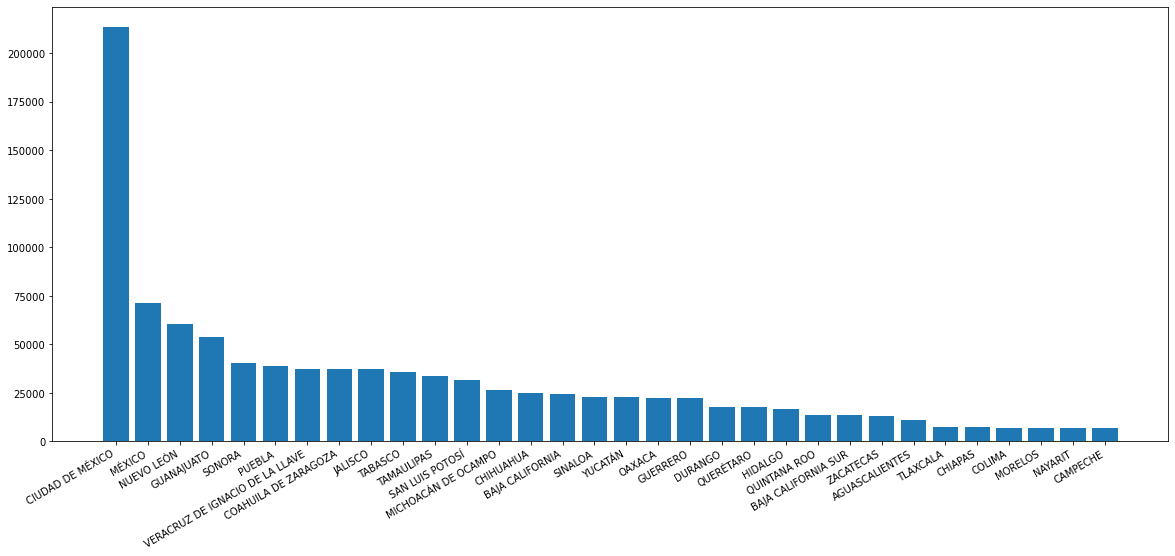

In [35]:
# 3. Gráfica de barras del número de positivos por estado
# Se aprovecha el DataFrame creado para el punto 3 del ejercicio 1

# Se define el tamaño de la gráfica
fig, ax = plt.subplots(figsize = (20, 8))

# Se define la gráfica de barras:
# - df_pos_por_estado["ENTIDAD_FEDERATIVA"] contiene las etiquetas
# - df_pos_por_estado["Num_Positivos"] contiene los valores
plt.bar(df_pos_por_estado["ENTIDAD_FEDERATIVA"], df_pos_por_estado["Num_Positivos"])

# Se giran 30º las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Se muestra la gráfica de barras
plt.show()

In [36]:
# 4. Gráfica de barras del número de fallecidos por estado
# 
# Se consideran defunciones aquellas filas con valor 1-Sí en la columna FALLECIDO

# Se guarda el conteo de fallecidos por estado en una variable
num_fallecidos = df[df["FALLECIDO"] == 1]["ENTIDAD_UM"].value_counts()

# Se crea un DataFrame auxiliar para que la información sea más accesible
df_aux = pd.DataFrame()
df_aux["Entidad"] = num_fallecidos.index
df_aux["Num_Fallecidos"] = num_fallecidos.values

# Se incorpora la descripción de cada estado al DataFrame de fallecidos con código de estado
df_fall_por_estado = df_aux.merge(catalogo["Catálogo de ENTIDADES"], left_on = "Entidad", right_on = "CLAVE_ENTIDAD", how = "inner")[["Entidad", "ENTIDAD_FEDERATIVA", "Num_Fallecidos"]]
df_fall_por_estado

,Entidad,ENTIDAD_FEDERATIVA,Num_Fallecidos
0,9,CIUDAD DE MÉXICO,25951
1,15,MÉXICO,17345
2,30,VERACRUZ DE IGNACIO DE LA LLAVE,6628
3,21,PUEBLA,6404
4,14,JALISCO,6269
5,19,NUEVO LEÓN,5759
6,2,BAJA CALIFORNIA,5539
7,25,SINALOA,5459
8,8,CHIHUAHUA,4784
9,11,GUANAJUATO,4719


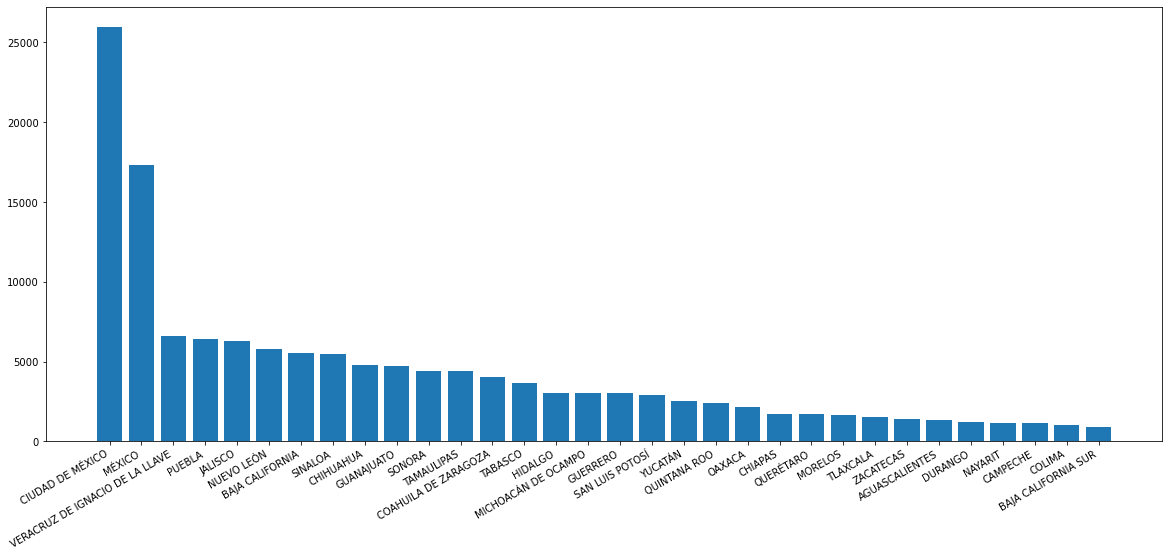

In [37]:
# Se define el tamaño de la gráfica
fig, ax = plt.subplots(figsize = (20, 8))

# Se define la gráfica de barras:
# - df_pos_por_estado["ENTIDAD_FEDERATIVA"] contiene las etiquetas
# - df_pos_por_estado["Num_Fallecidos"] contiene los valores
plt.bar(df_fall_por_estado["ENTIDAD_FEDERATIVA"], df_fall_por_estado["Num_Fallecidos"])

# Se giran 30º las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Se muestra la gráfica de barras
plt.show()

In [38]:
# 5. Gráfica de barras del número de positivos por la columna SECTOR
# 
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID

# Se crea un DataFrame para asignar la descripción de SECTOR a partir de su catálogo a cada paciente positivo
df_pos_sector = pd.DataFrame()

# Se filtran los datos para quedarnos sólo con los positivos
# Se agrupan las filas resultantes por SECTOR y hago un conteo
# Se convierte la serie que contiene el resultado a DataFrame, asignando el nombre "Num_Positivos" a la columna de conteos
# Se cruza el nuevo DataFrame con el catálogo SECTOR para extraer la descripción a partir de la clave del DataFrame original
df_pos_sector = df[df["COVID"] == 1].groupby("SECTOR").size().to_frame(name = "Num_Positivos").merge(catalogo["Catálogo SECTOR"], left_on = "SECTOR", right_on = "CLAVE")[["DESCRIPCIÓN", "Num_Positivos"]]
df_pos_sector

,DESCRIPCIÓN,Num_Positivos
0,CRUZ ROJA,86
1,DIF,618
2,ESTATAL,16589
3,IMSS,306002
4,IMSS-BIENESTAR,7179
5,ISSSTE,45136
6,MUNICIPAL,885
7,PEMEX,9253
8,PRIVADA,30711
9,SEDENA,9152


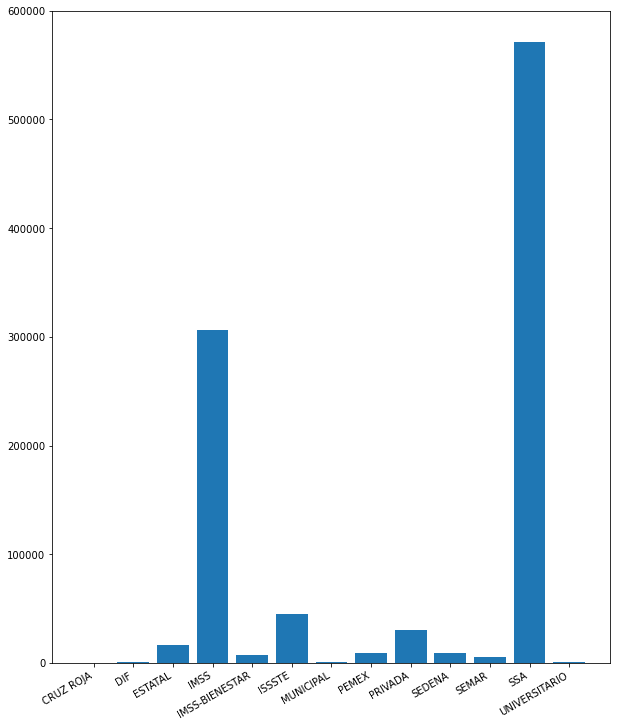

In [39]:
# Se define el tamaño de la gráfica
fig, ax = plt.subplots(figsize = (10, 12))

# Se define la gráfica de barras:
# - df_pos_sector["DESCRIPCIÓN"] contiene las etiquetas
# - df_pos_sector["Num_Positivos"] contiene los valores
plt.bar(df_pos_sector["DESCRIPCIÓN"], df_pos_sector["Num_Positivos"])

# Se giran 30º las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Se muestra la gráfica de barras
plt.show()

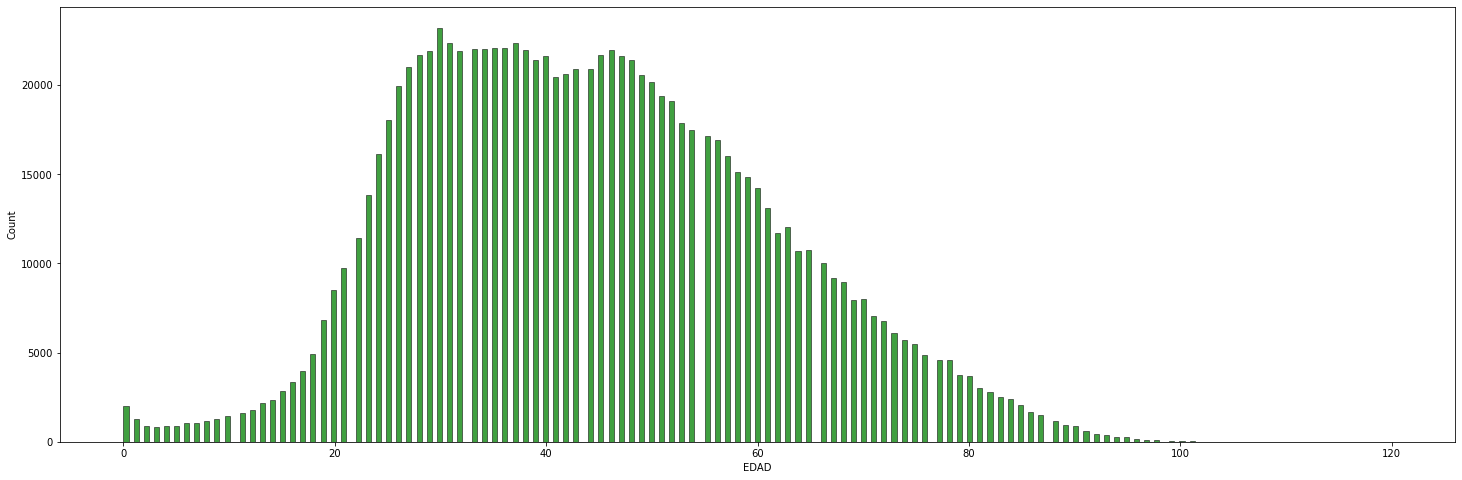

In [40]:
# 6. Histograma de la edad de los positivos
# 
# Se consideran positivos aquellas filas con valor 1-Sí en la columna COVID

# Se define el tamaño de la gráfica
plt.figure(figsize = (25, 8))

# Se define el histograma. Se mostrará la columna EDAD de los pacientes positivos
sns.histplot(x = df[df["COVID"] == 1]["EDAD"], color = "green")

# Se muestra el histograma
plt.show()

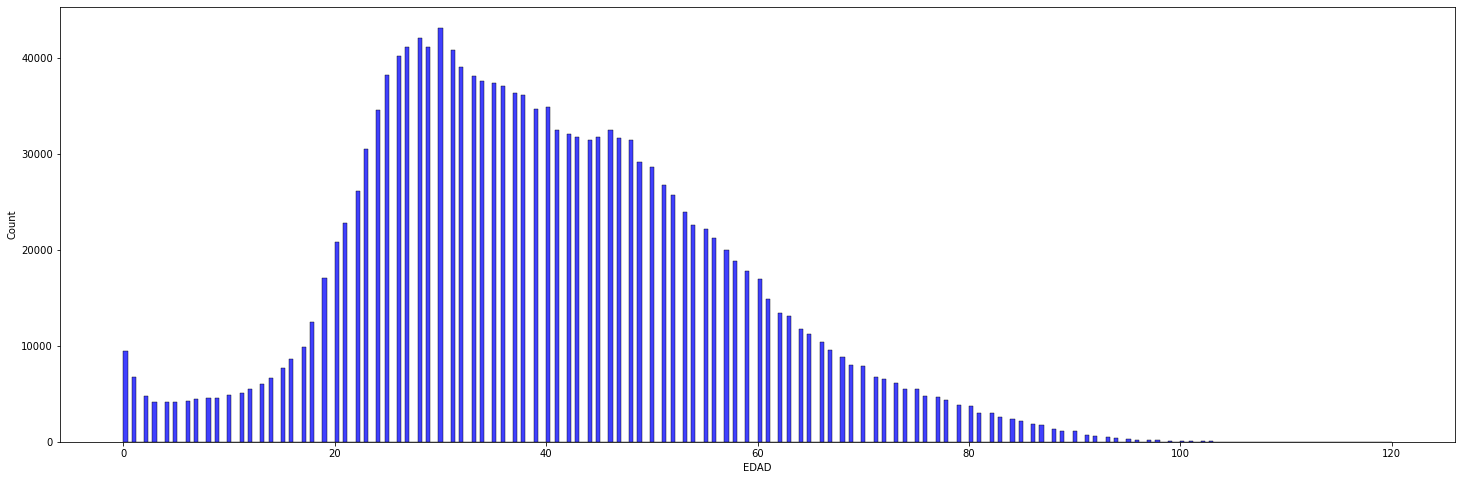

In [41]:
# 7. Histograma de la edad de los no positivos
# 
# Se consideran no positivos aquellas filas con valor 2-No en la columna COVID

# Se define el tamaño de la gráfica
plt.figure(figsize = (25, 8))

# Se define el histograma. Se mostrará la columna EDAD de los pacientes no positivos
sns.histplot(x = df[df["COVID"] == 2]["EDAD"], color = "blue")

# Se muestra el histograma
plt.show()


In [42]:
# 8. Mapa de calor de México con el número de positivos por estado utilizando folium
#
# Se aprovecha el DataFrame creado para el punto 3 del ejercicio 1

In [43]:
# Revisión de los ficheros de coordenadas de los estados de México

In [45]:
# Se carga el fichero CSV de coordenadas de estados
coord_estados = pd.read_csv("coord_estados.csv", encoding = "ISO-8859-1")
coord_estados.head()

,Clave Estado,Estado,Latitud,Longitud,Error
0,1,Aguascalientes,21.8818,-102.291,ok
1,2,Baja California,29.95,-115.116667,ok
2,3,Baja California Sur,25.625057,-111.700684,ok
3,4,Campeche,19.32920555,-89.94391483,ok
4,5,Coahuila De Zaragoza,27.32622,-102.163658,ok


In [46]:
# Se crea una nueva columna con el valor de "Estado" en el DataFrame "coord_estados" para validar los nombres más adelante
coord_estados["Estado2"] = coord_estados["Estado"].to_list()
coord_estados.head()

,Clave Estado,Estado,Latitud,Longitud,Error,Estado2
0,1,Aguascalientes,21.8818,-102.291,ok,Aguascalientes
1,2,Baja California,29.95,-115.116667,ok,Baja California
2,3,Baja California Sur,25.625057,-111.700684,ok,Baja California Sur
3,4,Campeche,19.32920555,-89.94391483,ok,Campeche
4,5,Coahuila De Zaragoza,27.32622,-102.163658,ok,Coahuila De Zaragoza


In [47]:
# Se carga el fichero JSON de los estados de México
import json

with open("mexico.json", "br") as file:
    mexico_json = json.load(file)

In [48]:
# Se vuelcan a una lista los nombres de los estados del fichero JSON
nombres = []

# La clave "features" del diccionario contiene un registro por estado
# En cada iteración, hay que acceder a la clave "properties" y, dentro de ese nuevo diccionario, a la clave "name"
for i in range(len(mexico_json["features"])):
    nombres.append(mexico_json["features"][i]["properties"]["name"])

# La lista de nombres se guarda en un DataFrame para simplificar su manejo
df_nombres = pd.DataFrame()
df_nombres["Nombres"] = nombres
df_nombres

,Nombres
0,Baja California
1,Baja California Sur
2,Coahuila De Zaragoza
3,Chihuahua
4,Durango
5,Sinaloa
6,Sonora
7,Zacatecas
8,Nuevo Leon
9,San Luis Potosi


In [49]:
# Se comparan los nombres de estados del CSV con los nombres de estados del JSON
# Se hace "outer" para comprobar la falta de nombres en los dos sentidos del cruce
df_analisis = coord_estados.merge(df_nombres, left_on = "Estado", right_on = "Nombres", how = "outer")
df_analisis

,Clave Estado,Estado,Latitud,Longitud,Error,Estado2,Nombres
0,1.0,Aguascalientes,21.8818,-102.291,ok,Aguascalientes,Aguascalientes
1,2.0,Baja California,29.95,-115.116667,ok,Baja California,Baja California
2,3.0,Baja California Sur,25.625057,-111.700684,ok,Baja California Sur,Baja California Sur
3,4.0,Campeche,19.32920555,-89.94391483,ok,Campeche,Campeche
4,5.0,Coahuila De Zaragoza,27.32622,-102.163658,ok,Coahuila De Zaragoza,Coahuila De Zaragoza
5,6.0,Colima,19.24997,-103.72714,ok,Colima,Colima
6,7.0,Chiapas,16.5000001,-92.5000001,ok,Chiapas,Chiapas
7,8.0,Chihuahua,28.5000001,-106.0000001,ok,Chihuahua,Chihuahua
8,9.0,Ciudad De Mexico,19.4326296,-99.1331785,ok,Ciudad De Mexico,NaN
9,10.0,Durango,24.833333,-104.833333,ok,Durango,Durango


In [50]:
# Estados que aparecen en "coord_estados.csv", pero no están en "mexico.json"
df_analisis.loc[pd.isna(df_analisis["Nombres"]), :]

# El estado "Ciudad De Mexico" de "coord_estados.csv" debería aparecer en "mexico.json". Habrá que comprobar si existe con otro identificador.
# El estado "Estados Unidos Mexicanos" no tiene latitud ni longitud informadas en "coord_estados.csv", así que es posible que no esté en "mexico.json".
# Las claves 97, 98 y 99 se consideran valores para datos incompletos y son asumibles. Esas filas se descartarán

,Clave Estado,Estado,Latitud,Longitud,Error,Estado2,Nombres
8,9.0,Ciudad De Mexico,19.4326296,-99.1331785,ok,Ciudad De Mexico,NaN
32,36.0,Estados Unidos Mexicanos,Sin información,Sin información,ok,Estados Unidos Mexicanos,NaN
33,97.0,No Aplica,Sin información,Sin información,error,No Aplica,NaN
34,98.0,Se Ignora,Sin información,Sin información,error,Se Ignora,NaN
35,99.0,No Especificado,Sin información,Sin información,error,No Especificado,NaN


In [51]:
# Estados que aparecen en "mexico.json", pero no están en "coord_estados.csv"
df_analisis.loc[pd.isna(df_analisis["Estado"]), :]

# Sólo falta la correspondencia de CDMX. Se trata de "Ciudad De Mexico", que tiene un nombre diferente en cada fichero

,Clave Estado,Estado,Latitud,Longitud,Error,Estado2,Nombres
36,NaN,NaN,NaN,NaN,NaN,NaN,CDMX


In [52]:
# Reemplazamos el nombre de "Ciudad de Mexico" que aparece en el CSV por "CDMX" que aparece en el JSON
df_analisis["Estado"].replace("Ciudad De Mexico", "CDMX", inplace = True)
df_analisis

,Clave Estado,Estado,Latitud,Longitud,Error,Estado2,Nombres
0,1.0,Aguascalientes,21.8818,-102.291,ok,Aguascalientes,Aguascalientes
1,2.0,Baja California,29.95,-115.116667,ok,Baja California,Baja California
2,3.0,Baja California Sur,25.625057,-111.700684,ok,Baja California Sur,Baja California Sur
3,4.0,Campeche,19.32920555,-89.94391483,ok,Campeche,Campeche
4,5.0,Coahuila De Zaragoza,27.32622,-102.163658,ok,Coahuila De Zaragoza,Coahuila De Zaragoza
5,6.0,Colima,19.24997,-103.72714,ok,Colima,Colima
6,7.0,Chiapas,16.5000001,-92.5000001,ok,Chiapas,Chiapas
7,8.0,Chihuahua,28.5000001,-106.0000001,ok,Chihuahua,Chihuahua
8,9.0,CDMX,19.4326296,-99.1331785,ok,Ciudad De Mexico,NaN
9,10.0,Durango,24.833333,-104.833333,ok,Durango,Durango


In [53]:
# Tratamiento de los datos

In [54]:
# Se crea un DataFrame para guardar sólo la información de los positivos por estado de aquellos estados con valor "ok" en la columna "Error" del CSV
df_datos_pos = df_pos_por_estado.merge(df_analisis[df_analisis["Error"] == "ok"], left_on = "Entidad", right_on = "Clave Estado",\
                                       how = "inner")[["Entidad", "Estado", "Latitud", "Longitud", "Num_Positivos"]]
df_datos_pos

,Entidad,Estado,Latitud,Longitud,Num_Positivos
0,9,CDMX,19.4326296,-99.1331785,213432
1,15,Estado De Mexico,19.4839446,-99.6899716,71267
2,19,Nuevo Leon,26.2384363,-99.8873,60247
3,11,Guanajuato,20.9876996,-101,53961
4,26,Sonora,29.3333331,-110.6666671,40427
5,21,Puebla,18.833333,-98,38740
6,30,Veracruz De Ignacio De La Llave,19.333333,-96.666667,37455
7,5,Coahuila De Zaragoza,27.32622,-102.163658,37327
8,14,Jalisco,20.3333331,-103.6666671,37323
9,27,Tabasco,17.95078635,-92.48312213,35847


In [56]:
# Se asigna la ruta del fichero JSON a una variable
mexico_geo = "mexico.json"

# Se crear el objeto mapa centrado en México con zoom = 6
mexico_map = folium.Map(location = [19.432608, -99.133209], zoom_start = 6)

# Aprovechando que tenemos las coordenadas de situación de los estados, se crea una instancia de un objeto MarkerCluster()
# para marcar su ubicación
pos = plugins.MarkerCluster()

# Se inicializa un FeatureGroup() para los estados en el DataFrame
estados = folium.map.FeatureGroup()


# Recorre todos los estados y agrega a cada uno al FeatureGroup() de estados
for lat, lng, label, in zip(df_datos_pos["Latitud"], df_datos_pos["Longitud"], df_datos_pos["Num_Positivos"]):
    estados.add_child(folium.Marker(location = [lat, lng],
                                    icon = None,
                                    popup = label))

# Se agregan los marcadores al mapa
mexico_map.add_child(estados)

# Se crea el mapa Choropleth con el área de los estados sombreados según la volumetría
folium.Choropleth(geo_data     = mexico_geo, # Fichero JSON
                  data         = df_datos_pos, # DataFrame de datos
                  columns      = ["Estado", "Num_Positivos"], # Del DataFrame, sólo queremos las columnas "Estado" y "Num_Positivos"
                  key_on       = "feature.properties.name", # Ubicación de la llave en el fichero JSON, que será el nombre de los estados
                  fill_color   = "Blues_r",
                  fill_opacity = 0.7, 
                  line_opacity = 0.2,
                  legend_name  = "Número de positivos por estado").add_to(mexico_map) # Se añade al mapa

# Se muestra el mapa
mexico_map

* 

In [57]:
# 9. Mapa de calor de México con el número de fallecidos por estado utilizando folium

# Se crea un DataFrame para guardar sólo la información de los fallecidos por estado de aquellos estados con valor "ok" en la columna "Error" del CSV
df_datos_fall = df_fall_por_estado.merge(df_analisis[df_analisis["Error"] == "ok"], left_on = "Entidad", right_on = "Clave Estado",\
                                         how = "inner")[["Entidad", "Estado", "Latitud", "Longitud", "Num_Fallecidos"]]
df_datos_fall.head()

,Entidad,Estado,Latitud,Longitud,Num_Fallecidos
0,9,CDMX,19.4326296,-99.1331785,25951
1,15,Estado De Mexico,19.4839446,-99.6899716,17345
2,30,Veracruz De Ignacio De La Llave,19.333333,-96.666667,6628
3,21,Puebla,18.833333,-98,6404
4,14,Jalisco,20.3333331,-103.6666671,6269


In [58]:
# Aprovechamos la variable "mexico_geo" que contiene la ruta del fichero JSON del punto anterior
# mexico_geo = "mexico.json"

# Se inicializa de nuevo el objeto mapa centrado en México con zoom = 6
mexico_map = folium.Map(location = [19.432608, -99.133209], zoom_start = 6)

# Como en el punto anterior, se crea una instancia de un objeto MarkerCluster() para marcar la ubicación de los estados
pos = plugins.MarkerCluster()


# Se inicializa de nuevo el FeatureGroup() para los estados en el DataFrame
estados = folium.map.FeatureGroup()

# Recorre todos los estados y agrega a cada uno al FeatureGroup() de estados
for lat, lng, label, in zip(df_datos_fall["Latitud"], df_datos_fall["Longitud"], df_datos_fall["Num_Fallecidos"]):
    mexico_map.add_child(folium.Marker(location = [lat, lng],
                                       icon = None,
                                       popup = label))

# Se agregan los marcadores al mapa
mexico_map.add_child(pos)

# Se crea el mapa Choropleth con el área de los estados sombreados según la volumetría 
folium.Choropleth(geo_data     = mexico_geo, # Fichero JSON
                  data         = df_datos_fall, # DataFrame de datos
                  columns      = ["Estado", "Num_Fallecidos"], # Del DataFrame, sólo queremos las columnas "Estado" y "Num_Positivos"
                  key_on       = "feature.properties.name", # Ubicación de la llave en el fichero JSON, que será el nombre de los estados
                  fill_color   = "Blues_r", 
                  fill_opacity = 0.7, 
                  line_opacity = 0.2,
                  legend_name  = "Número de fallecidos por estado").add_to(mexico_map) # Se añade al mapa

# Se muestra el mapa
mexico_map

- **¿Que otras graficas podrias extraer del dataset?**
    - **Analiza el dataset y muestra 5 graficas, pueden ser cualquiera de las vistas en clases.**

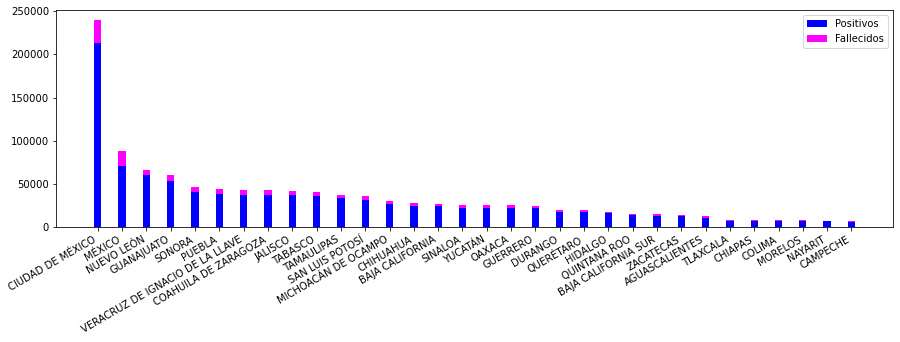

In [59]:
# 1. Gráfica de barras apiladas para mostrar pacientes positivos vs pacientes fallecidos por estado

# Se define el tamaño de la gráfica
fig, ax = plt.subplots(figsize = (15, 4))

# Etiquetas para el eje x
etiquetas = df_pos_por_estado["ENTIDAD_FEDERATIVA"].to_list()

# Lista de valores de pacientes positivos por estado
valores1 = df_pos_por_estado["Num_Positivos"].tolist()

# Lista de valores de pacientes fallecidos por estado
valores2 = df_fall_por_estado["Num_Fallecidos"].tolist()

# Array de la misma longitud que las etiquetas
x = np.arange(len(etiquetas))

# Ancho de las barras
ancho = 0.3

# Gráfico de barras para los positivos
plt.bar(etiquetas, valores1, ancho, color = "blue", label = "Positivos")

# Gráfico de barras para los fallecidos, apilado sobre la representación de los positivos
plt.bar(etiquetas, valores2, ancho, color = "magenta", label="Fallecidos", bottom = valores1)

# Leyenda para el gráfico
plt.legend(loc = "best")

# Se giran 30º las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Se muestra la gráfica de barras
plt.show()

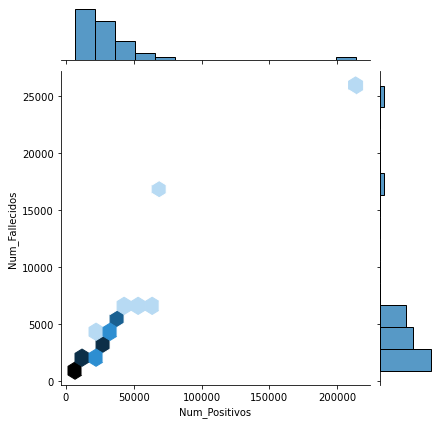

In [60]:
# 2. Gráfico de dispersión y columnas (jointplot) para mostrar la relación entre pacientes positivos y pacientes fallecidos por estado

# Se define la gráfica
sns.jointplot(x = df_pos_por_estado["Num_Positivos"], 
              y = df_fall_por_estado["Num_Fallecidos"],
              kind = "hex", # Se utilizan hexágonos en la parte de dispersión
              gridsize = 20)

# Se muestra la gráfica
plt.show()

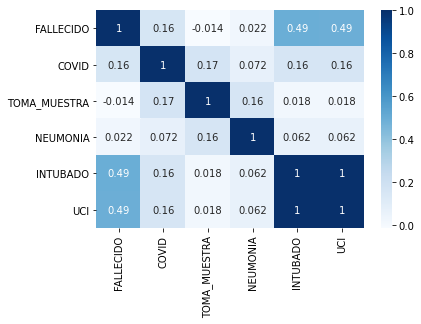

In [61]:
# 3. Mapa de calor para comprobar la relación entre la toma de muestra al paciente, si al paciente se le diagnosticó con neumonía,
# si requirió de intubación, si requirió ingresar en UCI, si falleció y si fue positivo

# Se define la gráfica
sns.heatmap(data = df[["FALLECIDO", "COVID", "TOMA_MUESTRA", "NEUMONIA", "INTUBADO", "UCI"]].corr(), # Columnas para calcular correlación
            annot = True, # Anotación con los porcentajes
            cmap = "Blues")

# Se muestra la gráfica
plt.show()

In [62]:
# 4. KDEplot para representar la edad promedio de los positivos y el número de positivos por estado
#
# Se aprovecha el DataFrame df_pos_por_estado del ejercicio 1

# Se crea un DataFrame nuevo para guardar la edad promedio de los positivos por estado
df_edad_pos_estado = pd.DataFrame()
df_edad_pos_estado = df[df["COVID"] == 1][["ENTIDAD_UM","EDAD"]].groupby("ENTIDAD_UM").mean()
df_edad_pos_estado["EDAD"] = round(df_edad_pos_estado["EDAD"])
df_edad_pos_estado.head()

,EDAD
ENTIDAD_UM,
1,43.0
2,45.0
3,41.0
4,46.0
5,43.0


In [63]:
# Se unen df_pos_por_estado y df_edad_pos_estado en una DataFrame auxiliar para tener toda la información junta
df_aux = pd.DataFrame()
df_aux = df_pos_por_estado.merge(df_edad_pos_estado, left_on = "Entidad", right_on = "ENTIDAD_UM", how = "inner")
df_aux.head()

,Entidad,ENTIDAD_FEDERATIVA,Num_Positivos,EDAD
0,9,CIUDAD DE MÉXICO,213432,44.0
1,15,MÉXICO,71267,46.0
2,19,NUEVO LEÓN,60247,43.0
3,11,GUANAJUATO,53961,42.0
4,26,SONORA,40427,44.0


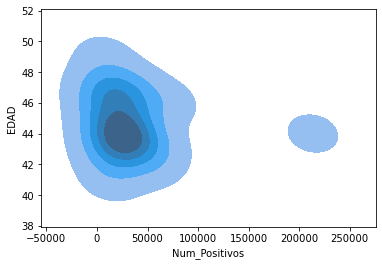

In [64]:
# Se define la gráfica
sns.kdeplot(x = df_aux.Num_Positivos,
            y = df_aux.EDAD,
            shade = True,
            levels = 6)

# Se muestra la gráfica
plt.show()

In [65]:
# 4. KDEplot para representar la edad promedio de los fallecidos y el número de fallecidos por estado
#
# Se aprovecha el DataFrame df_fall_por_estado del punt 4

# Se crea un DataFrame nuevo para guardar la edad promedio de los fallecidos por estado
df_edad_fall_estado = pd.DataFrame()
df_edad_fall_estado = df[df["FALLECIDO"] == 1][["ENTIDAD_UM","EDAD"]].groupby("ENTIDAD_UM").mean()
df_edad_fall_estado["EDAD"] = round(df_edad_fall_estado["EDAD"])
df_edad_fall_estado.head()

,EDAD
ENTIDAD_UM,
1,62.0
2,61.0
3,62.0
4,63.0
5,62.0


In [66]:
# Se unen df_fall_por_estado y df_edad_fall_estado en una DataFrame auxiliar para tener toda la información junta
df_aux = pd.DataFrame()
df_aux = df_fall_por_estado.merge(df_edad_fall_estado, left_on = "Entidad", right_on = "ENTIDAD_UM", how = "inner")
df_aux.head()

,Entidad,ENTIDAD_FEDERATIVA,Num_Fallecidos,EDAD
0,9,CIUDAD DE MÉXICO,25951,63.0
1,15,MÉXICO,17345,60.0
2,30,VERACRUZ DE IGNACIO DE LA LLAVE,6628,63.0
3,21,PUEBLA,6404,60.0
4,14,JALISCO,6269,64.0


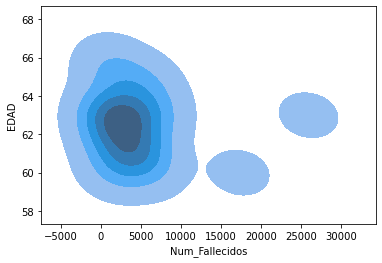

In [67]:
# Se define la gráfica
sns.kdeplot(x = df_aux.Num_Fallecidos,
            y = df_aux.EDAD,
            shade = True,
            levels = 6)

# Se muestra la gráfica
plt.show()